Python学习手册

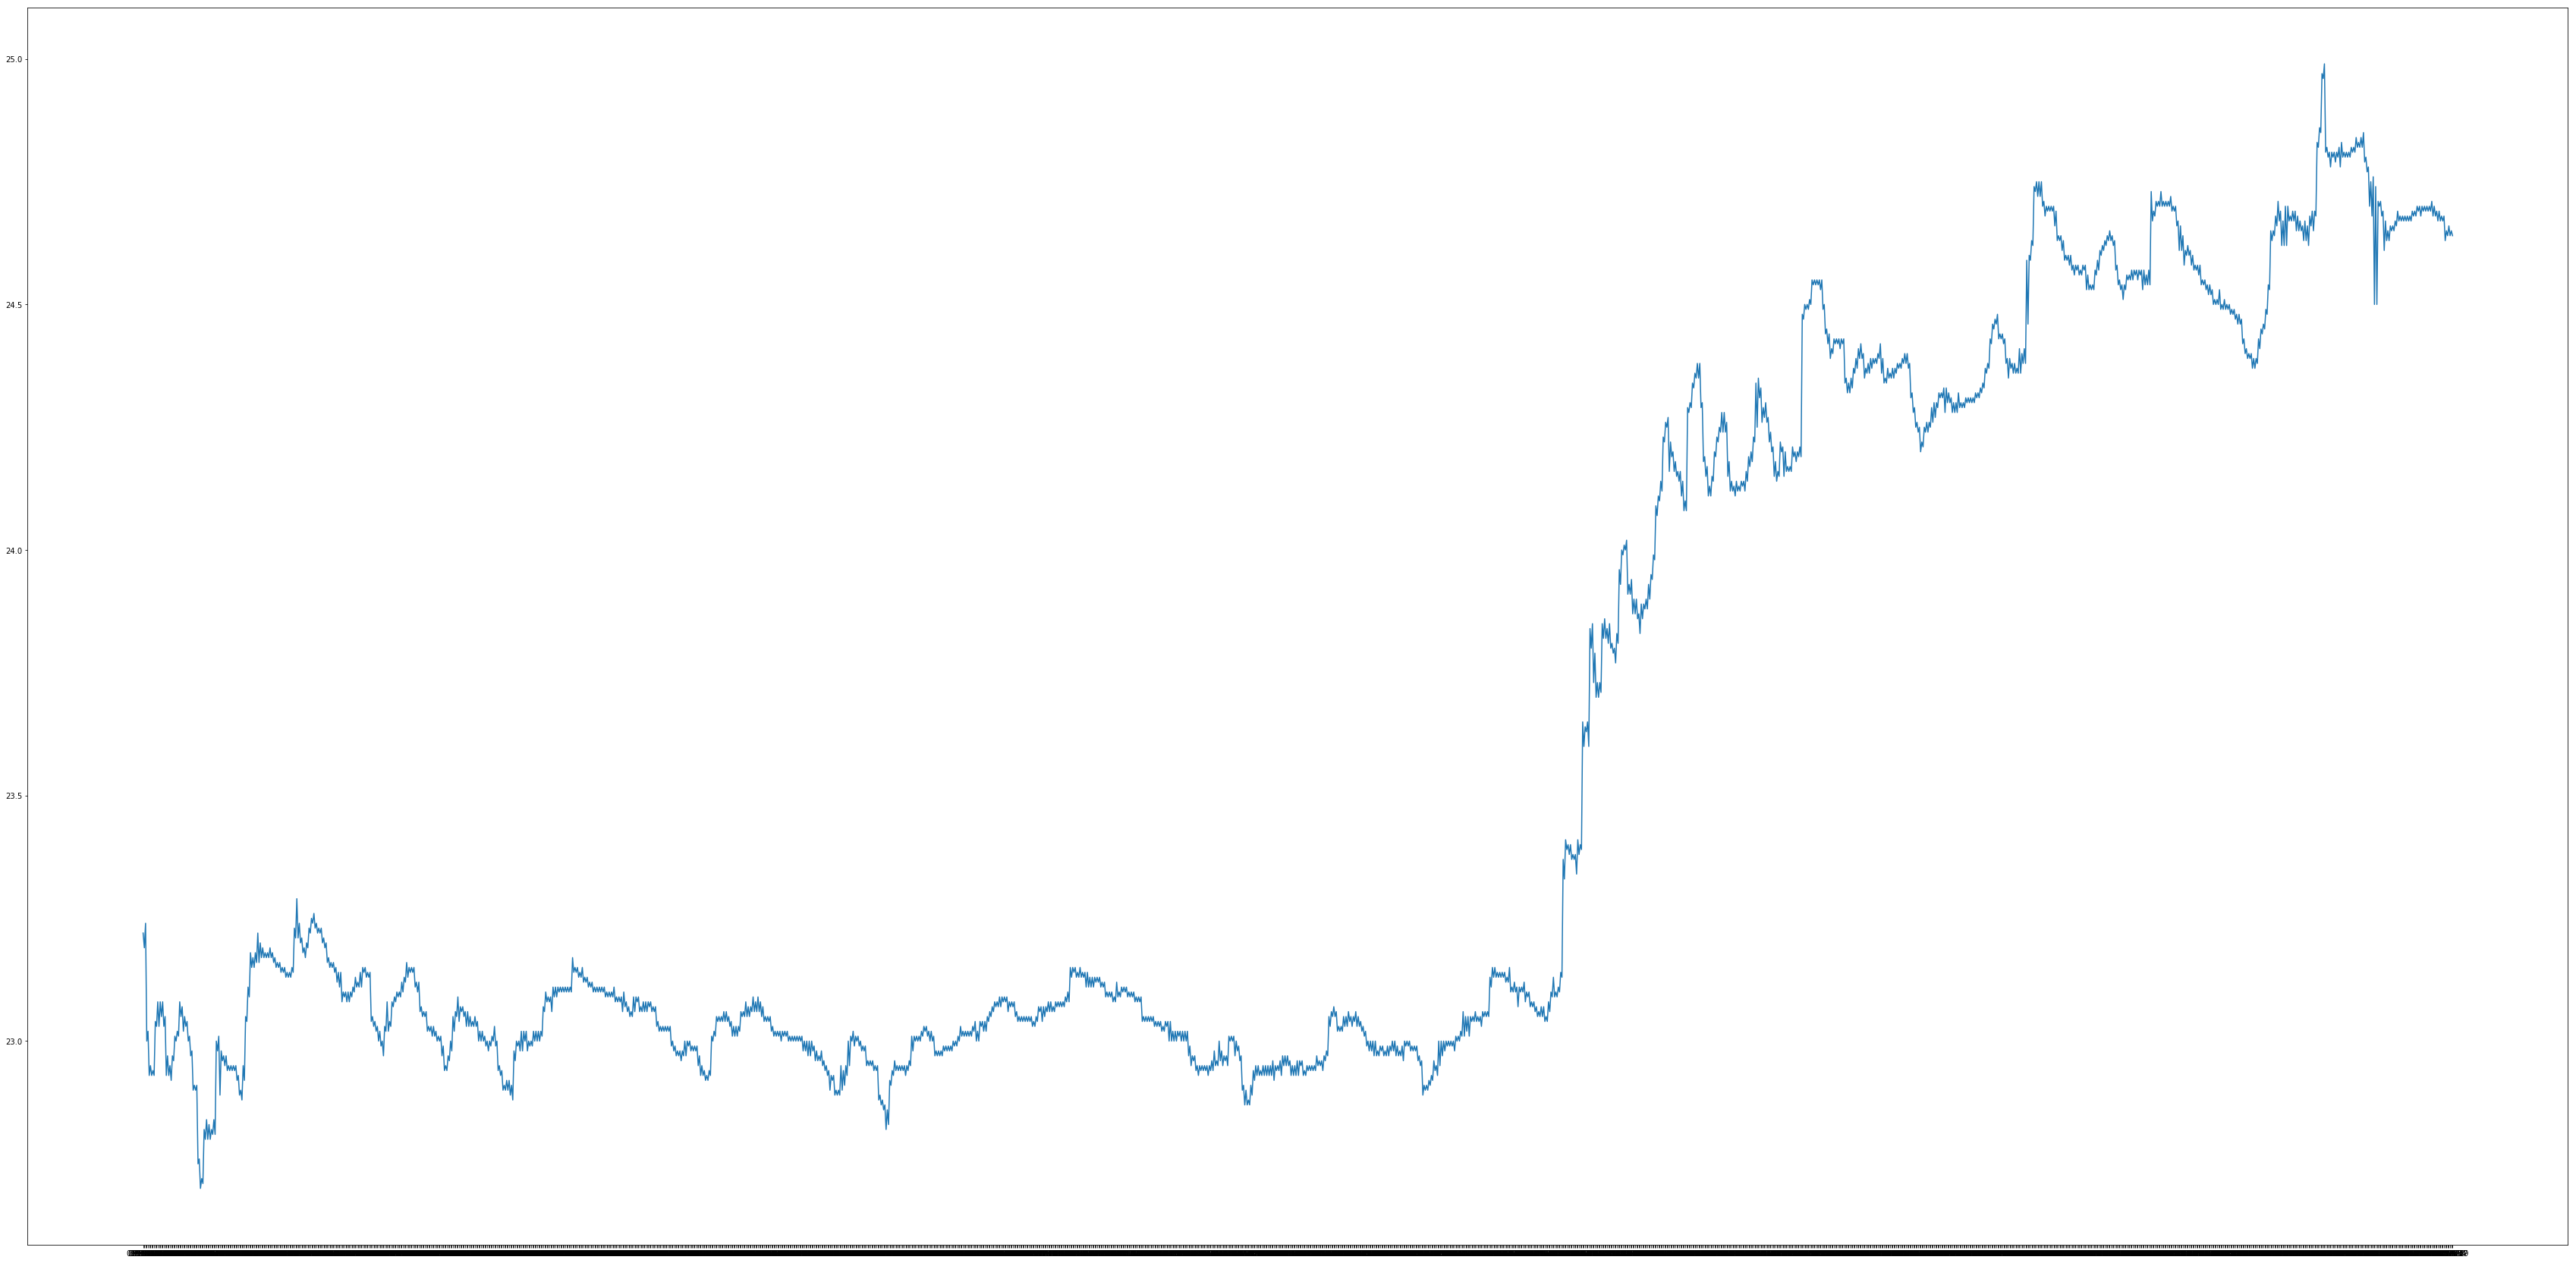

In [23]:
import tushare as ts
import matplotlib.pyplot as plt

df=ts.get_tick_data('600516', date='2017-11-24')
df=df.sort_values('time')
df['lastprice'] = df.shift(1)['price']
df=df[df.price!=df.lastprice]
df['lastprice'] = df.shift(1)['price']
df['nextprice'] = df.shift(-1)['price']

top_index=df[(df['lastprice'] < df['price']) & (df['price'] > df['nextprice'])].index
df.loc[top_index, 'turnaround']=1

bottom_index=df[(df['lastprice'] > df['price']) & (df['price'] < df['nextprice'])].index
df.loc[bottom_index, 'turnaround']=-1
df = df.dropna(axis=0, how="any")

plt.figure(figsize=(60,30))
pytimes = df['time']
pyprice = df['price']
plt.plot(pytimes, pyprice)
plt.show()
